## Autostereograms


I want to see if i can implement a creator of autostereograms.

Autostereograms are those images that looks like a repetitive pattern, but if you focus enough (like if you were staring at the nothingness of your existance) you can see a hidden shape.

The effect is achieved simply by adjusting the horizontal shift of the pattern according to depth values of the shape you are trying to hide. 

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

In [155]:
class AutostereogramMaker:
    
    def __init__(self, pattern):
        self.pattern = pattern
        self.maxShiftProportion = 0.1
        
        if(len(np.shape(pattern)) == 3):
            self.colored = True
        else:
            self.colored = False
    
    def normalizeImage(self, image):
        n = np.size(image,0)
        m = np.size(image,1)
        
        minVal = np.min(image)
        maxVal = np.max(image)
        
        normImage = np.zeros(np.shape(image))
        for i in range(0,n):
            for j in range(0,m):
                normImage[i,j] = (image[i,j] - minVal)/(maxVal-minVal)
        
        return normImage
                
        
    
    def createAutostereogram(self, depthImage):
        n = np.size(depthImage,0)
        m = np.size(depthImage,1)
        
        depthImage = self.normalizeImage(depthImage)
        
        nPattern = np.size(self.pattern,0)
        mPattern = np.size(self.pattern,1)
        
        if(self.colored == False):
            autostereogram = np.zeros((n,m))
            
            for i in range(0,n):
                for j in range(0,m):
                    
                    if(j < mPattern):
                        autostereogram[i,j] = self.pattern[i % nPattern, j]
                    
                    else:
                        #Obtain the shift
                        depthValue = depthImage[i,j]
                        shiftValue = int(depthValue*self.maxShiftProportion*mPattern)
                        autostereogram[i,j] = autostereogram[i,j-mPattern+shiftValue]
            
            return autostereogram
        
        else:
            autostereogram = np.zeros((n,m,3))
        
            for i in range(0,n):
                for j in range(0,m):
                    
                    if(j < mPattern):
                        autostereogram[i,j,:] = self.pattern[i % nPattern, j,:]
                    
                    else:
                        #Obtain the shift
                        depthValue = depthImage[i,j]
                        shiftValue = int(depthValue*self.maxShiftProportion*mPattern)
                        autostereogram[i,j] = autostereogram[i,j-mPattern+shiftValue]
            
            return autostereogram
        
        
        
        
        

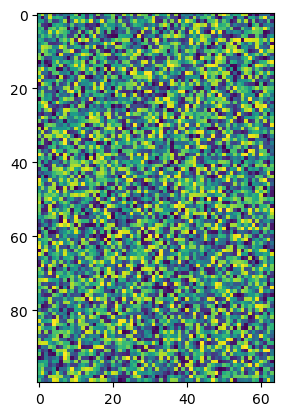

In [156]:

#Let's do a simple random pattern

patternN = 100
patternM = 64

pattern = np.zeros((patternN, patternM))

for i in range(0,patternN):
    for j in range(0,patternM):
        pattern[i,j] = random.randint(0,100)/100



plt.figure()
plt.imshow(pattern)
autostereogramMaker = AutostereogramMaker(pattern)


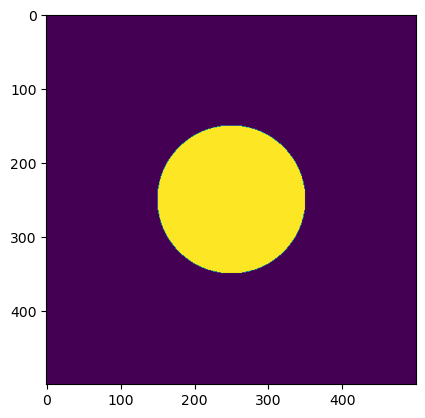

In [157]:
#Now let's make a depth map. 

depthMap = np.zeros((500,500))
centerX = 250
centerY = 250

radius = 100

for i in range(0,500):
    for j in range(0,500):
        dst = np.sqrt((i - centerX)**2 + (j - centerY)**2)
        if(dst < radius):
            depthMap[i,j] = 1

plt.figure()
plt.imshow(depthMap)        

In [158]:
#Let's create a simple autostereogram with that

autostereogram = autostereogramMaker.createAutostereogram(depthMap)

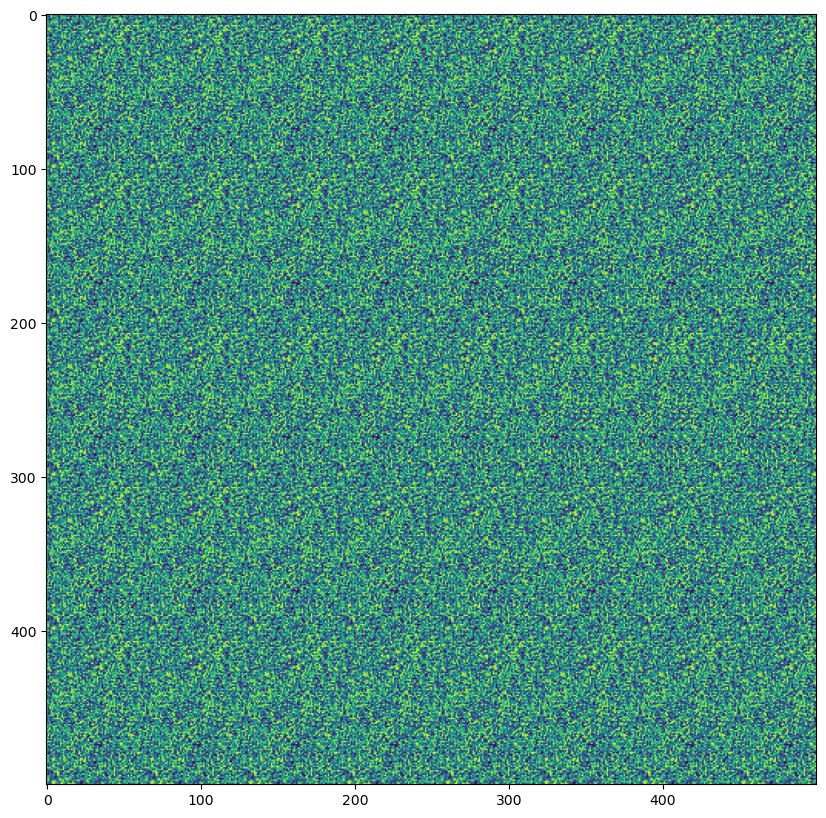

In [159]:
plt.figure(figsize = (10,10))
plt.imshow(autostereogram)

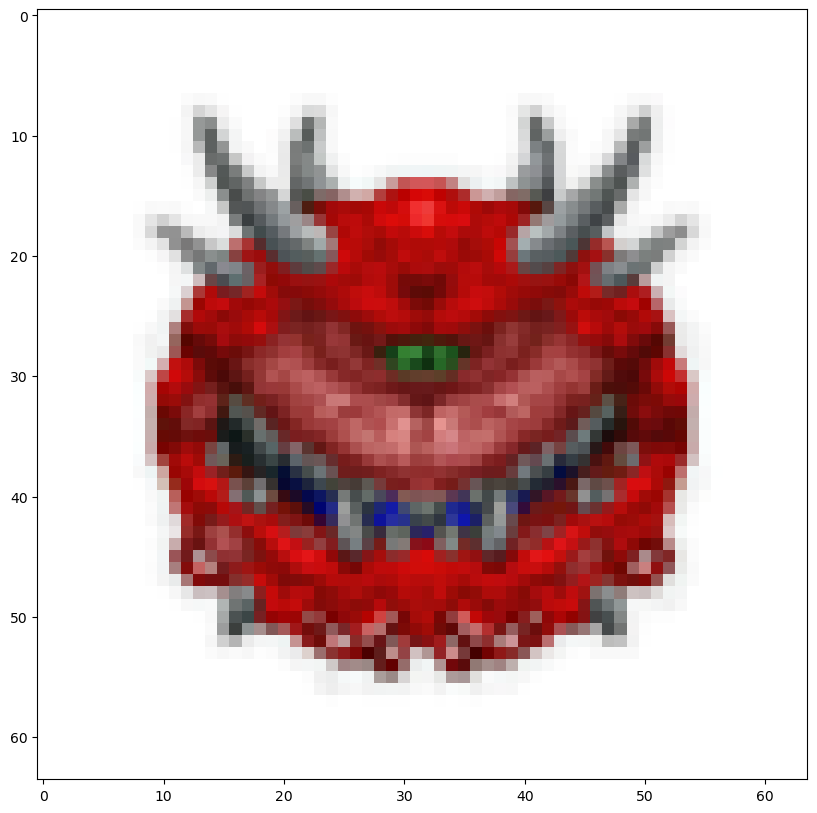

In [162]:
#It seems to work. How about using a color pattern
pattern = np.asarray(Image.open("caco_demon.jpg").resize((64,64)))

pattern = pattern/255

plt.figure(figsize = (10,10))
plt.imshow(pattern)

In [172]:
autostereogramMaker = AutostereogramMaker(pattern)
autostereogram = autostereogramMaker.createAutostereogram(depthMap)


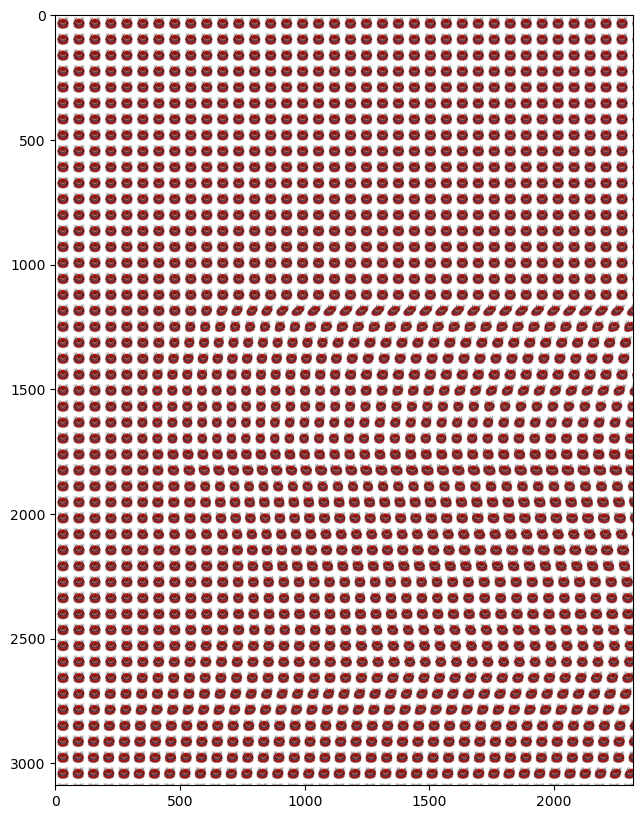

In [173]:
plt.figure(figsize = (10,10))
plt.imshow(autostereogram)

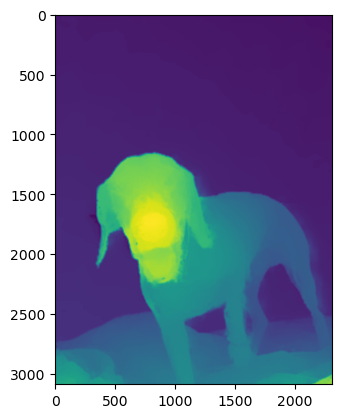

In [191]:
##Now let's try it with an image of my dog

#I will actually use a depth map of my dog rocky

depthMap = np.asarray(Image.open("depth_rocky.jpg").convert('L'))
depthMap = depthMap/np.max(depthMap)

plt.figure()
plt.imshow(depthMap)

In [217]:
#Let's do a simple random pattern

patternN = 400
patternM = 400

pattern = np.zeros((patternN, patternM))

for i in range(0,patternN):
    for j in range(0,patternM):
        pattern[i,j] = random.randint(0,255)/255

autostereogramMaker = AutostereogramMaker(pattern)

In [222]:
autostereogramMaker.maxShiftProportion = 0.4
autostereogram = autostereogramMaker.createAutostereogram(depthMap)

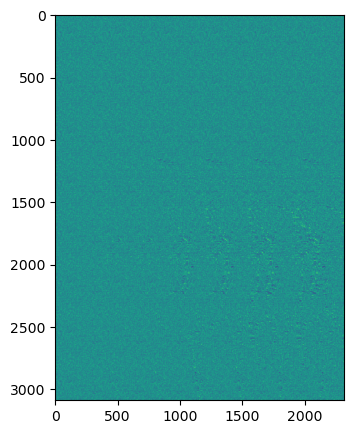

In [223]:
plt.figure(figsize = (5,5))
plt.imshow(autostereogram)